# Project: Electric Field of Multiple Point Charges
## Objective:
- Calculate and visualize the electric field vectors and field lines for multiple point charges in 2D.
- Apply the superposition principle to find the net field at each point.

In [4]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# ------------------------------
# Define charges and positions
# ------------------------------
charges = [1, -1, 2]  # in Coulombs
positions = [np.array([-2,0]), np.array([2,0]), np.array([0,2])]  # x, y coordinates
k = 9e9  # Coulomb constant (N·m²/C²)

In [16]:
# ------------------------------
# Create a grid of points
# ------------------------------
x = np.linspace(-5,5,200)
y = np.linspace(-5,5,200)
X, Y = np.meshgrid(x,y)

In [18]:
# Initialize field components
Ex = np.zeros_like(X)
Ey = np.zeros_like(Y)

In [20]:
# ------------------------------
# Calculate electric field using superposition
# ------------------------------
for q, pos in zip(charges, positions):
    rx = X - pos[0]
    ry = Y - pos[1]
    r_squared = rx**2 + ry**2
    r_squared[r_squared == 0] = 1e-20  # avoid division by zero
    Ex += k * q * rx / r_squared**(3/2)
    Ey += k * q * ry / r_squared**(3/2)

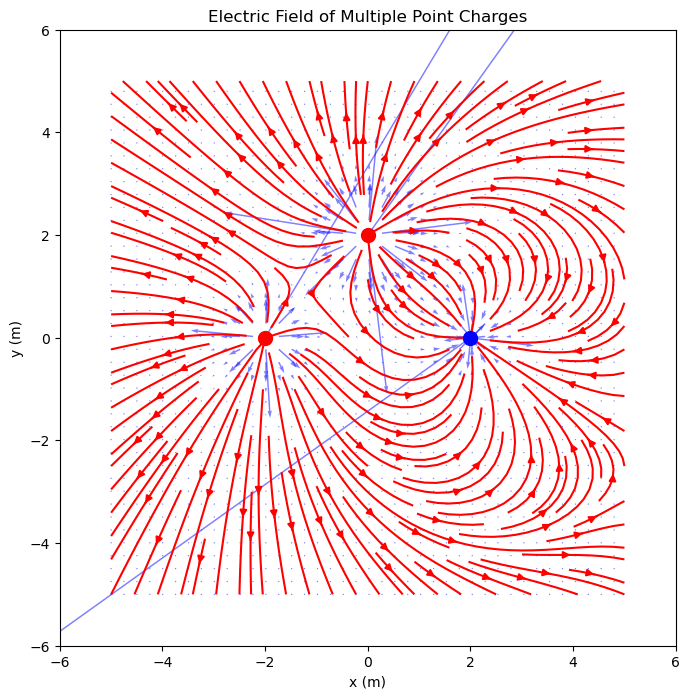

In [26]:
# ------------------------------
# Plot field vectors and field lines
# ------------------------------
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
# Quiver plot for field vectors
skip = (slice(None, None, 5), slice(None, None, 5))
ax.quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color='blue', alpha=0.5)
# Streamplot for field lines
ax.streamplot(X, Y, Ex, Ey, color='red', density=1.5)

# Plot charge positions
for q, pos in zip(charges, positions):
    color = 'ro' if q > 0 else 'bo'
    ax.plot(pos[0], pos[1], color, markersize=10)

ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Electric Field of Multiple Point Charges')
plt.show()